In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customers_df = pd.read_csv('data/Customers.csv')
products_df = pd.read_csv('data/Products.csv')
transactions_df = pd.read_csv('data/Transactions.csv')

In [3]:
def print_dataset_info(df, name):
    print(f"\n{name} Dataset Info:")
    print(f"Shape: {df.shape}")
    print("\nSample data:")
    print(df.head())
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())

In [4]:
print_dataset_info(customers_df, "Customers")
print_dataset_info(products_df, "Products")
print_dataset_info(transactions_df, "Transactions")


Customers Dataset Info:
Shape: (200, 4)

Sample data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Data types:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Missing values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Dataset Info:
Shape: (100, 4)

Sample data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005         

In [5]:
def analyze_sales():
    merged_df = transactions_df.merge(products_df, on='ProductID')
    category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    category_revenue.plot(kind='bar')
    plt.title('Total Revenue by Category')
    plt.xlabel('Category')
    plt.ylabel('Revenue (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    region_sales = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    region_sales.plot(kind='bar')
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Sales (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    customer_data = transactions_df.merge(customers_df[['CustomerID', 'CustomerName']], on='CustomerID')
    customer_frequency = customer_data.groupby(['CustomerID', 'CustomerName']).size().sort_values(ascending=False)
    print("\nTop 10 customers by purchase frequency:")
    print(customer_frequency.head(10))

    product_data = transactions_df.merge(products_df[['ProductID', 'ProductName', 'Category']], on='ProductID')
    product_popularity = product_data.groupby(['ProductID', 'ProductName', 'Category'])['Quantity'].sum().sort_values(ascending=False)
    print("\nTop 10 products by quantity sold:")
    print(product_popularity.head(10))

    avg_transaction = transactions_df['TotalValue'].mean()
    print(f"\nAverage transaction value: ${avg_transaction:.2f}")

    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='line')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Sales (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

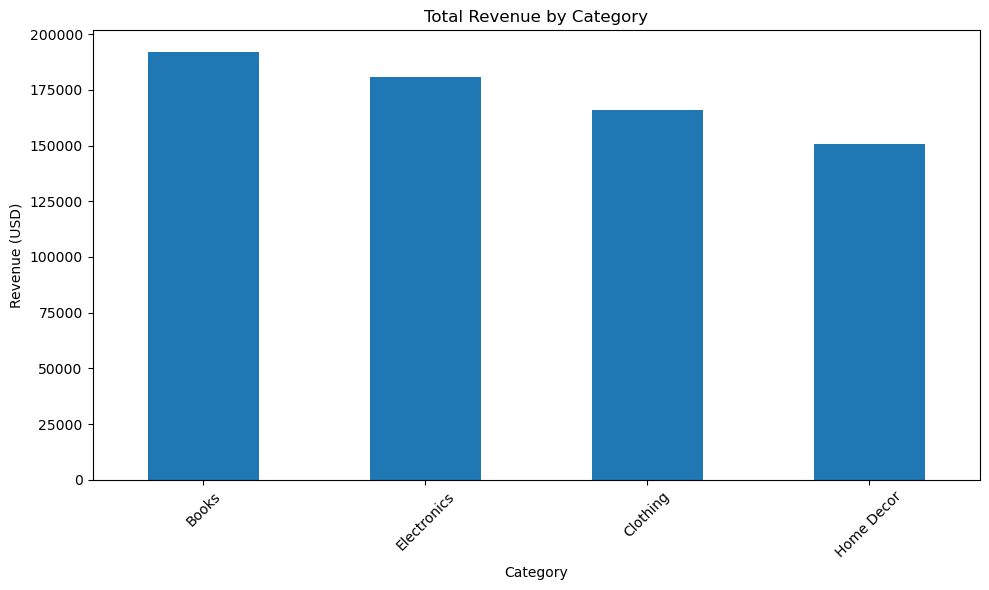

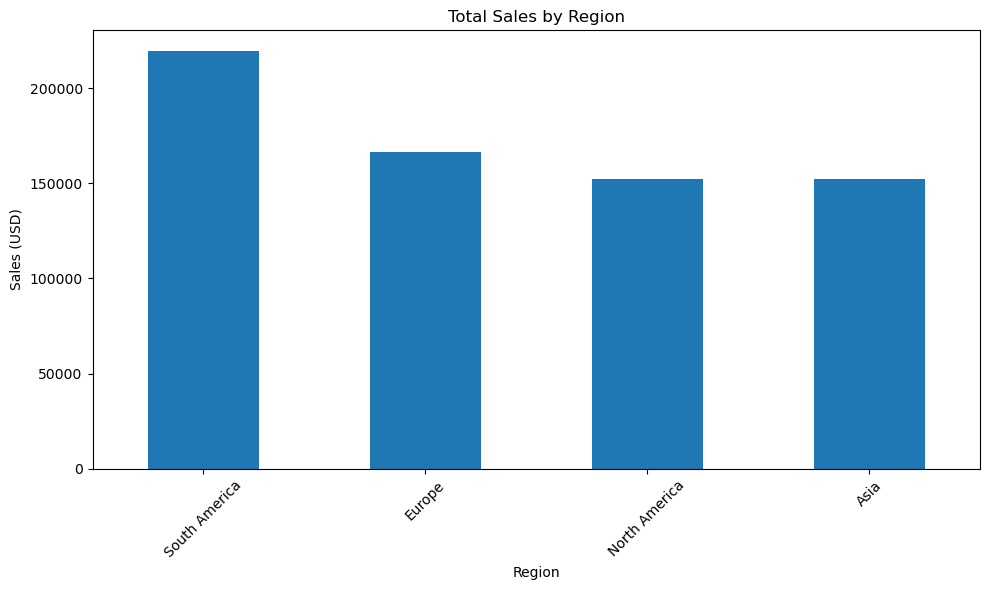


Top 10 customers by purchase frequency:
CustomerID  CustomerName   
C0156       William Adams      11
C0109       Abigail Jones      11
C0175       Matthew Johnson    10
C0141       Paul Parsons       10
C0065       Gerald Hines       10
C0008       David Li           10
C0084       Belinda Garner      9
C0075       Misty Higgins       9
C0165       Juan Mcdaniel       9
C0147       Hunter Fuller       9
dtype: int64

Top 10 products by quantity sold:
ProductID  ProductName            Category   
P059       SoundWave Jeans        Clothing       46
P054       SoundWave Cookbook     Books          46
P029       TechPro Headphones     Electronics    45
P079       ActiveWear Rug         Home Decor     43
P061       HomeSense Desk Lamp    Home Decor     43
P057       ActiveWear Smartphone  Electronics    43
P048       TechPro Cookbook       Books          43
P062       HomeSense Novel        Books          39
P020       ActiveWear Jacket      Clothing       38
P028       HomeSense Desk Lam

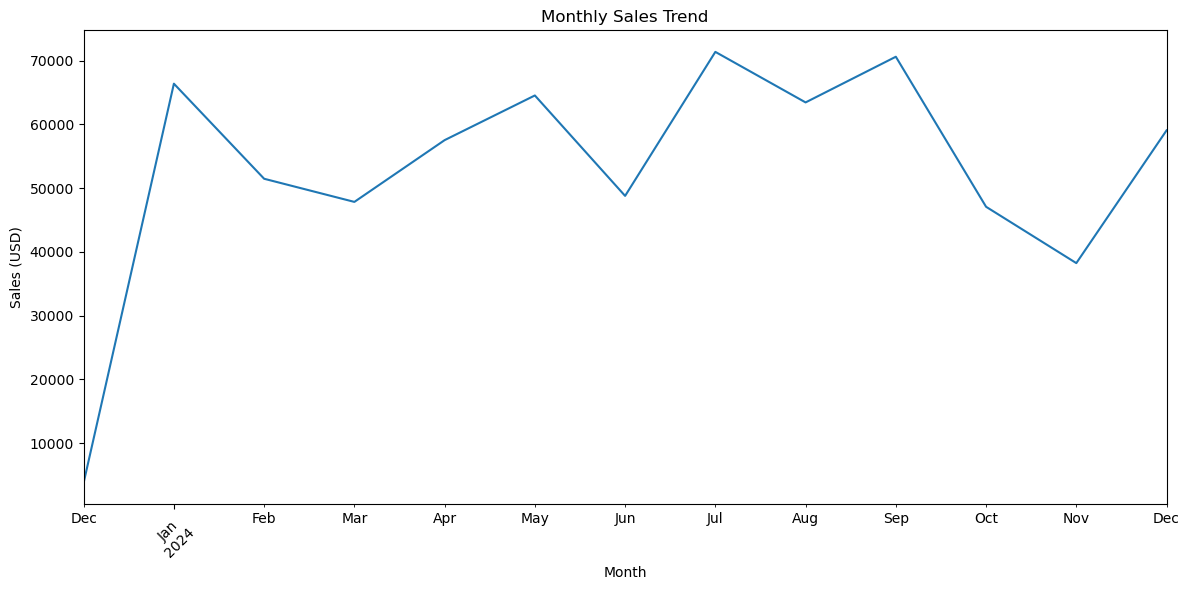

In [6]:
analyze_sales()